<img src='https://gitlab.com/alessandro.bombini.fi/dataviz_labec/-/raw/master/Assets/Pics/labec.png' >

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print(f'Using Google Colab Notebook')
    #################################################################################
    #   MAGIC TRICK FOR HAVING google drive mounted correctly!
    #################################################################################
    from google.colab import drive
    drive.mount('/content/drive')

    %cd '/content/drive/MyDrive/DataViz@LABEC/'

    !ls
else: 
    print(f'Using Jupyter Notebook')
    #################################################################################
    #   MAGIC TRICK FOR HAVING tab, shift+tab COMMANDS!
    #################################################################################
    %config Completer.use_jedi = False

# 3. Basis of (1D) Data Visualization

### 3.0.1. Scatter plot

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
path_to_data = './Datasets/14C_calibration/intcal20_data.csv'

df_intcal = pd.read_csv(path_to_data, sep=' ')
print(f'Number of rows: {len(df_intcal)}')

display(df_intcal)

print(f"\nMin of cal: {df_intcal['cal'].min()}\tMax of cal: {df_intcal['cal'].max()}")
print(f"Min of c14: {df_intcal['c14'].min()}\t\tMax of c14: {df_intcal['c14'].max()}")

Number of rows: 12904


set  div      cal    c14  c14sig  calsig
0        1    1     20.0    148      18       1
1        1    1     21.0    190      18       1
2        1    1     22.0    158      18       1
3        1    1     23.0    162      14       1
4        1    1     24.0    140      18       1
...    ...  ...      ...    ...     ...     ...
12899  126    1  24435.0  19913     310     135
12900  126    1  24591.0  20470     317     141
12901  126    1  24630.0  20512     286     141
12902  126    1  24670.0  20289     312     142
12903  126    1  25074.0  20014     301     159

[12904 rows x 6 columns]


Min of cal: -4.0	Max of cal: 61806.2
Min of c14: 32		Max of c14: 56430


In [4]:
# Order df by values in x, i.e. Cal

df_intcal.sort_values(
    by='cal',
    inplace=True # change the original
)

display(df_intcal)

set  div      cal    c14  c14sig  calsig
281      1    4     -4.0    179      30       1
282      1    4     -3.0    193      20       1
283      1    4     -2.0    208      18       1
284      1    4     -1.0    207      18       1
285      1    4      0.0    210      18       1
...    ...  ...      ...    ...     ...     ...
12034  120    1  60007.4  54166    2493     290
12036  120    1  60917.3  50248    3439     443
12037  120    1  60917.3  51848    3512     443
12038  120    1  61806.2  56430    5418     596
12039  120    1  61806.2  56030    3543     596

[12904 rows x 6 columns]

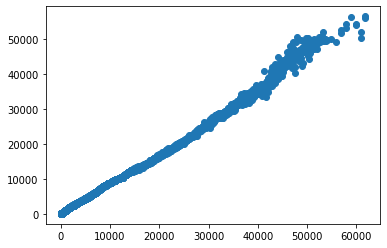

In [5]:
plt.scatter(
    x=df_intcal['cal'],
    y=df_intcal['c14']
)

plt.show()

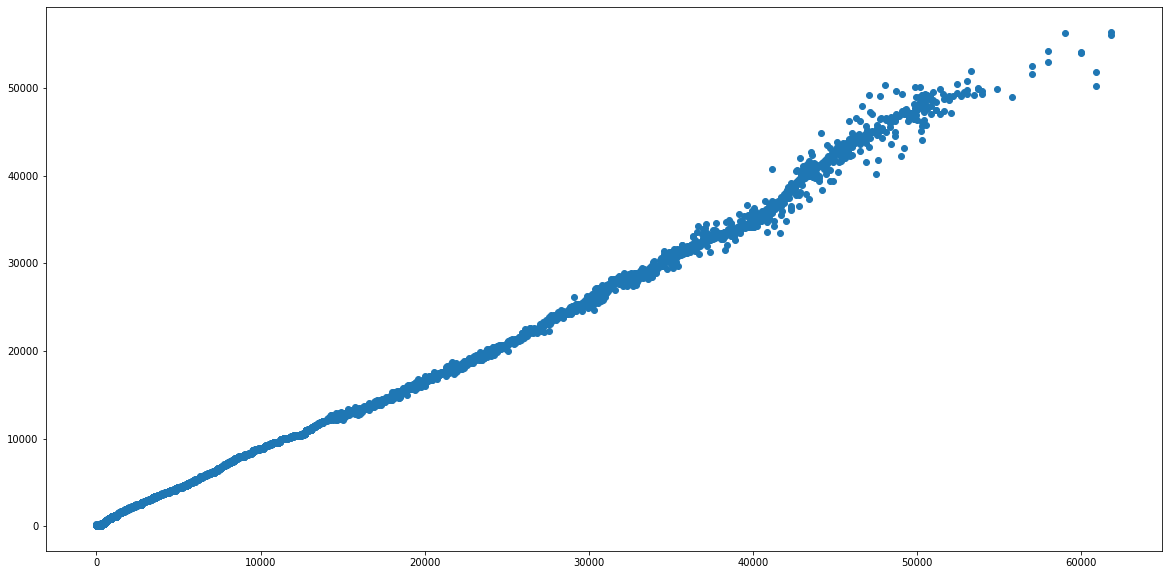

In [6]:
# Set size
plt.figure(
    figsize=(20,10)
)

plt.scatter(
    x=df_intcal['cal'],
    y=df_intcal['c14']
)

plt.show()

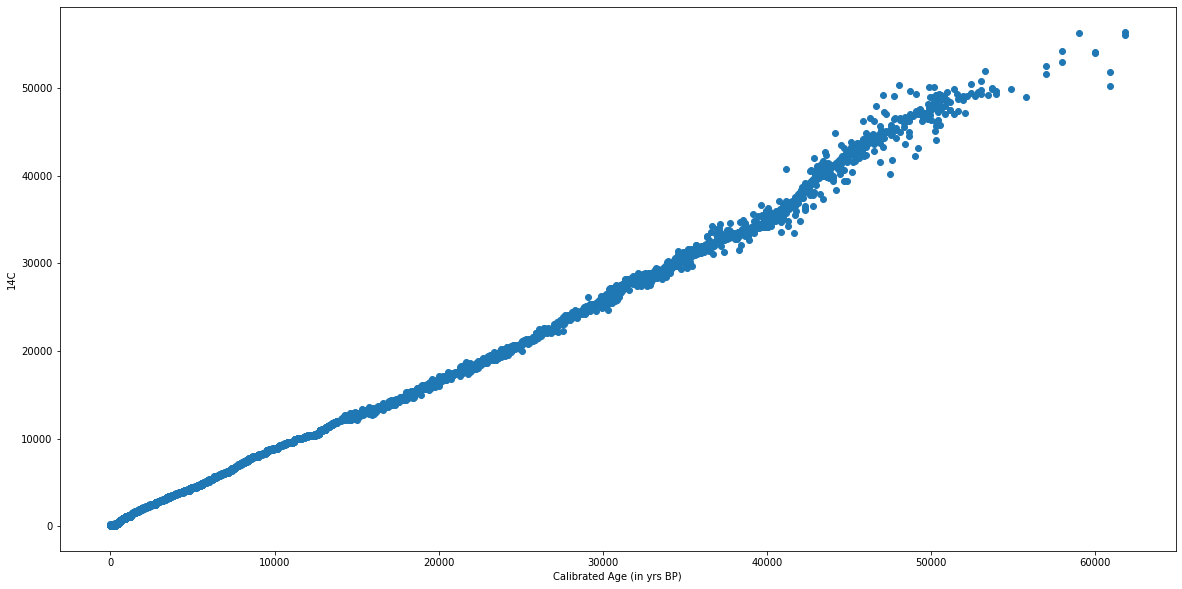

In [7]:
# Add axis labels
plt.figure(
    figsize=(20,10)
)

plt.scatter(
    x=df_intcal['cal'],
    y=df_intcal['c14']
)

plt.xlabel( 'Calibrated Age (in yrs BP)' )
plt.ylabel( '14C' )

plt.show()

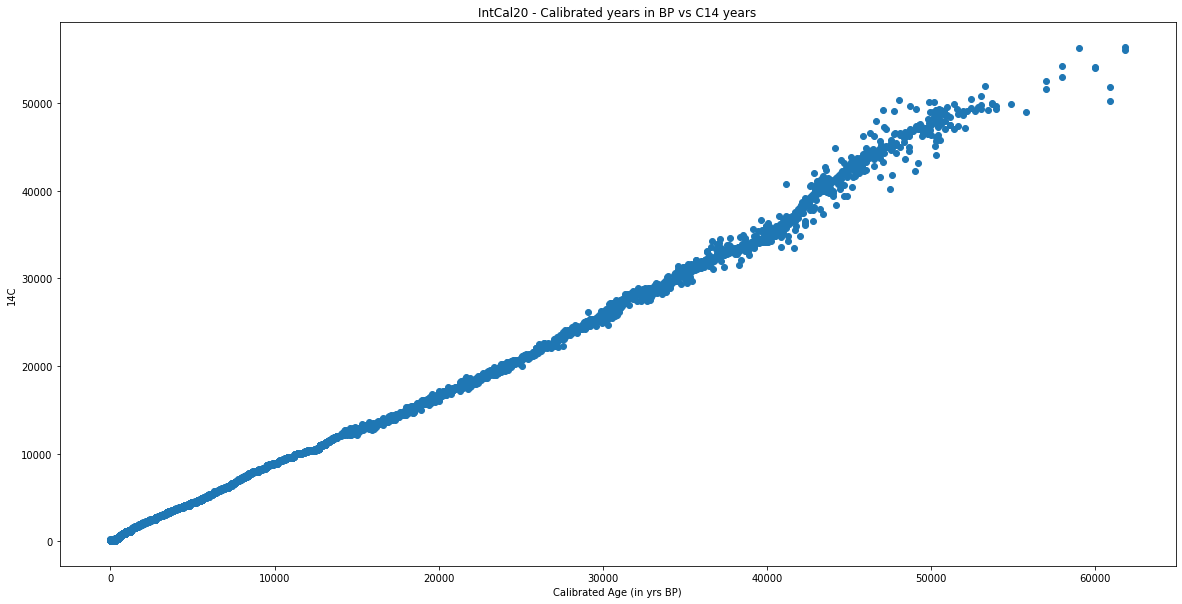

In [8]:
# Add Title
plt.figure(
    figsize=(20,10)
)

plt.scatter(
    x=df_intcal['cal'],
    y=df_intcal['c14']
)

plt.xlabel( 'Calibrated Age (in yrs BP)' )
plt.ylabel( '14C' )
plt.title('IntCal20 - Calibrated years in BP vs C14 years')

plt.show()

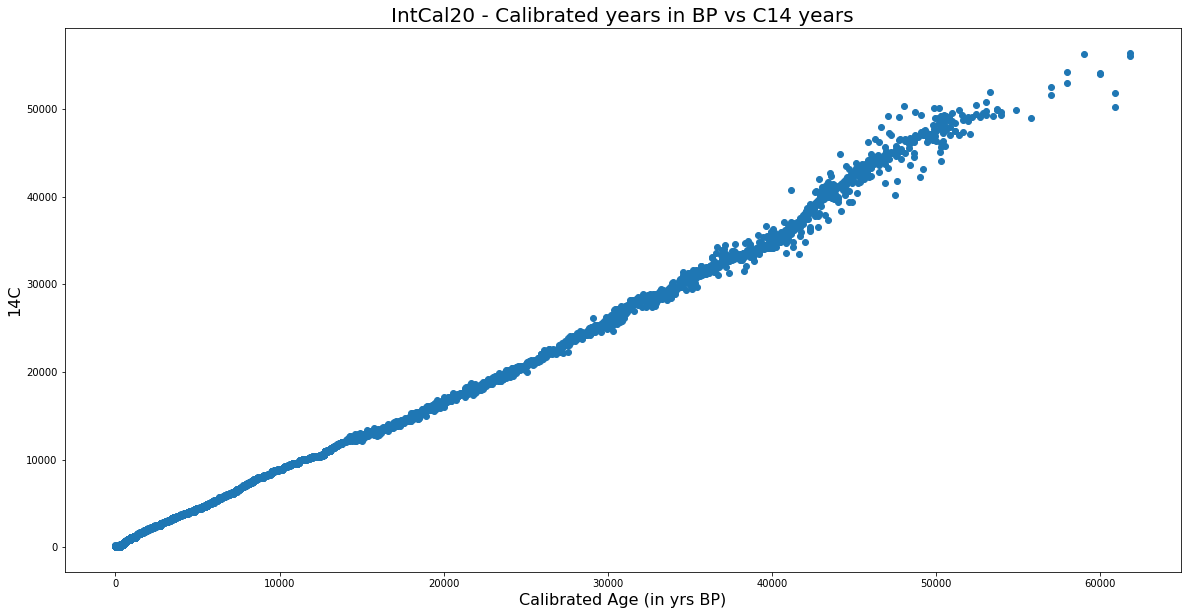

In [9]:
# Set font sizes
plt.figure(
    figsize=(20,10)
)

plt.scatter(
    x=df_intcal['cal'],
    y=df_intcal['c14']
)

plt.xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
plt.ylabel( '14C' , fontsize=16)
plt.title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

plt.show()

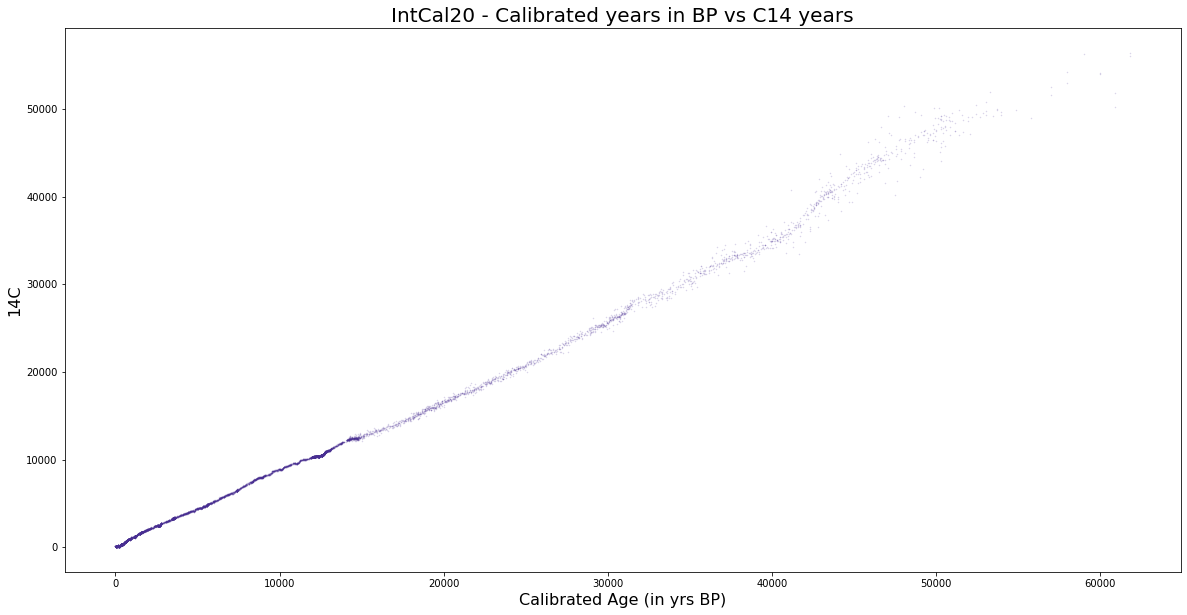

In [10]:
# Set marker type, color, alpha, etc
plt.figure(
    figsize=(20,10)
)

plt.scatter(
    x=df_intcal['cal'],
    y=df_intcal['c14'],
    # marker
    marker = 'x',
    # color
    c = '#482e92', # Fiorentina's purple,
    # alpha
    alpha=0.2,
    # Marker scale
    s = 0.3
)

plt.xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
plt.ylabel( '14C' , fontsize=16)
plt.title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

plt.show()

#### 3.0.1.1. Subplots

Number of data: 12904


Text(0, 0.5, '14C')

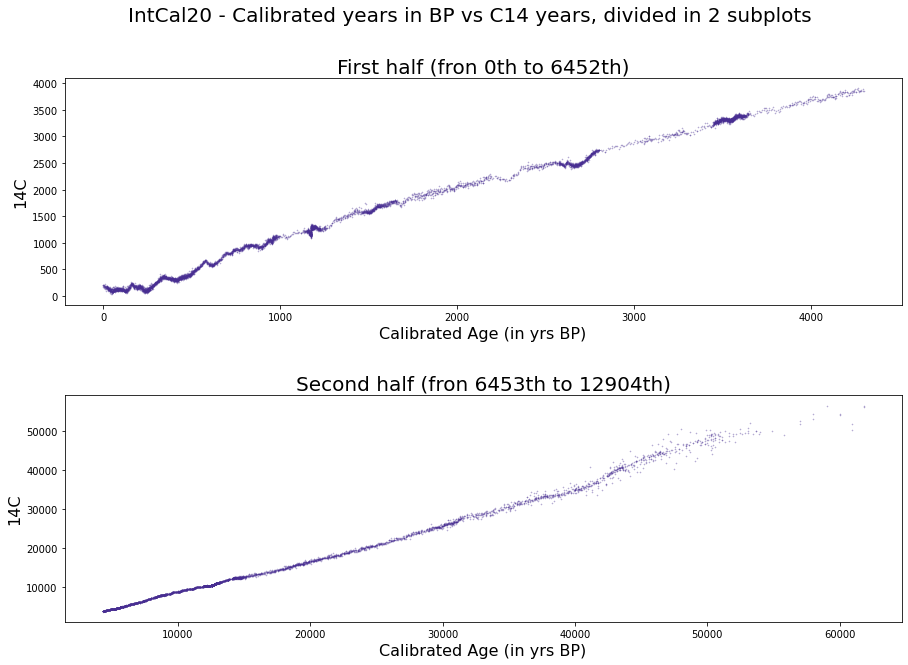

In [11]:
# Divide the plot in two
fig, (ax1, ax2) = plt.subplots(
    2,
    figsize=(15,10),
    # Add vertical space
    gridspec_kw={
        'hspace': 0.4 # height-space, NOT horizontal space. Don't ask why
    }
)

# Set suptitle
fig.suptitle(f'IntCal20 - Calibrated years in BP vs C14 years, divided in 2 subplots', fontsize=20)

print(f'Number of data: {len(df_intcal)}')
mid_value = len(df_intcal)//2

ax1.scatter(
    # set interval of data
    x=df_intcal['cal'][:mid_value],
    y=df_intcal['c14'][:mid_value],
    # marker
    marker = 'x',
    # color
    c = '#482e92', # Fiorentina's purple,
    # alpha
    alpha=0.4,
    # Marker scale
    s = 0.4
)
ax1.set_title(f'First half (fron 0th to {mid_value}th)', fontsize=20)
ax1.set_xlabel('Calibrated Age (in yrs BP)' , fontsize=16)
ax1.set_ylabel('14C' , fontsize=16)

ax2.scatter(
    # set interval of data
    x=df_intcal['cal'][mid_value:],
    y=df_intcal['c14'][mid_value:],
    # marker
    marker = 'x',
    # color
    c = '#482e92', # Fiorentina's purple,
    # alpha
    alpha=0.4,
    # Marker scale
    s = 0.4
)

ax2.set_title(f'Second half (fron {mid_value+1}th to {len(df_intcal)}th)', fontsize=20)
ax2.set_xlabel('Calibrated Age (in yrs BP)' , fontsize=16)
ax2.set_ylabel('14C' , fontsize=16)

Number of data: 12904


Text(0, 0.5, '14C')

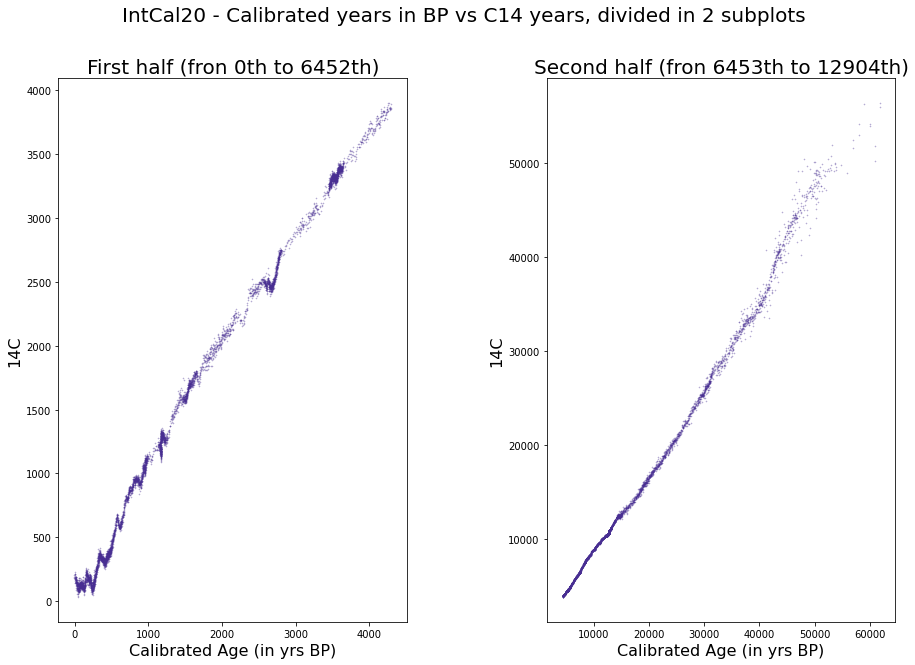

In [12]:
# Divide the plot in two, HORIZONTALY
fig, (ax1, ax2) = plt.subplots(
    1,2,
    figsize=(15,10),
    # Add vertical space
    gridspec_kw={
        'wspace': 0.4 # width-space
    }
)

# Set suptitle
fig.suptitle(f'IntCal20 - Calibrated years in BP vs C14 years, divided in 2 subplots', fontsize=20)

print(f'Number of data: {len(df_intcal)}')
mid_value = len(df_intcal)//2

ax1.scatter(
    # set interval of data
    x=df_intcal['cal'][:mid_value],
    y=df_intcal['c14'][:mid_value],
    # marker
    marker = 'x',
    # color
    c = '#482e92', # Fiorentina's purple,
    # alpha
    alpha=0.4,
    # Marker scale
    s = 0.4
)
ax1.set_title(f'First half (fron 0th to {mid_value}th)', fontsize=20)
ax1.set_xlabel('Calibrated Age (in yrs BP)' , fontsize=16)
ax1.set_ylabel('14C' , fontsize=16)

ax2.scatter(
    # set interval of data
    x=df_intcal['cal'][mid_value:],
    y=df_intcal['c14'][mid_value:],
    # marker
    marker = 'x',
    # color
    c = '#482e92', # Fiorentina's purple,
    # alpha
    alpha=0.4,
    # Marker scale
    s = 0.4
)

ax2.set_title(f'Second half (fron {mid_value+1}th to {len(df_intcal)}th)', fontsize=20)
ax2.set_xlabel('Calibrated Age (in yrs BP)' , fontsize=16)
ax2.set_ylabel('14C' , fontsize=16)

Min of cal: -4.0	Max of cal: 61806.2
Min of c14: 32		Max of c14: 56430


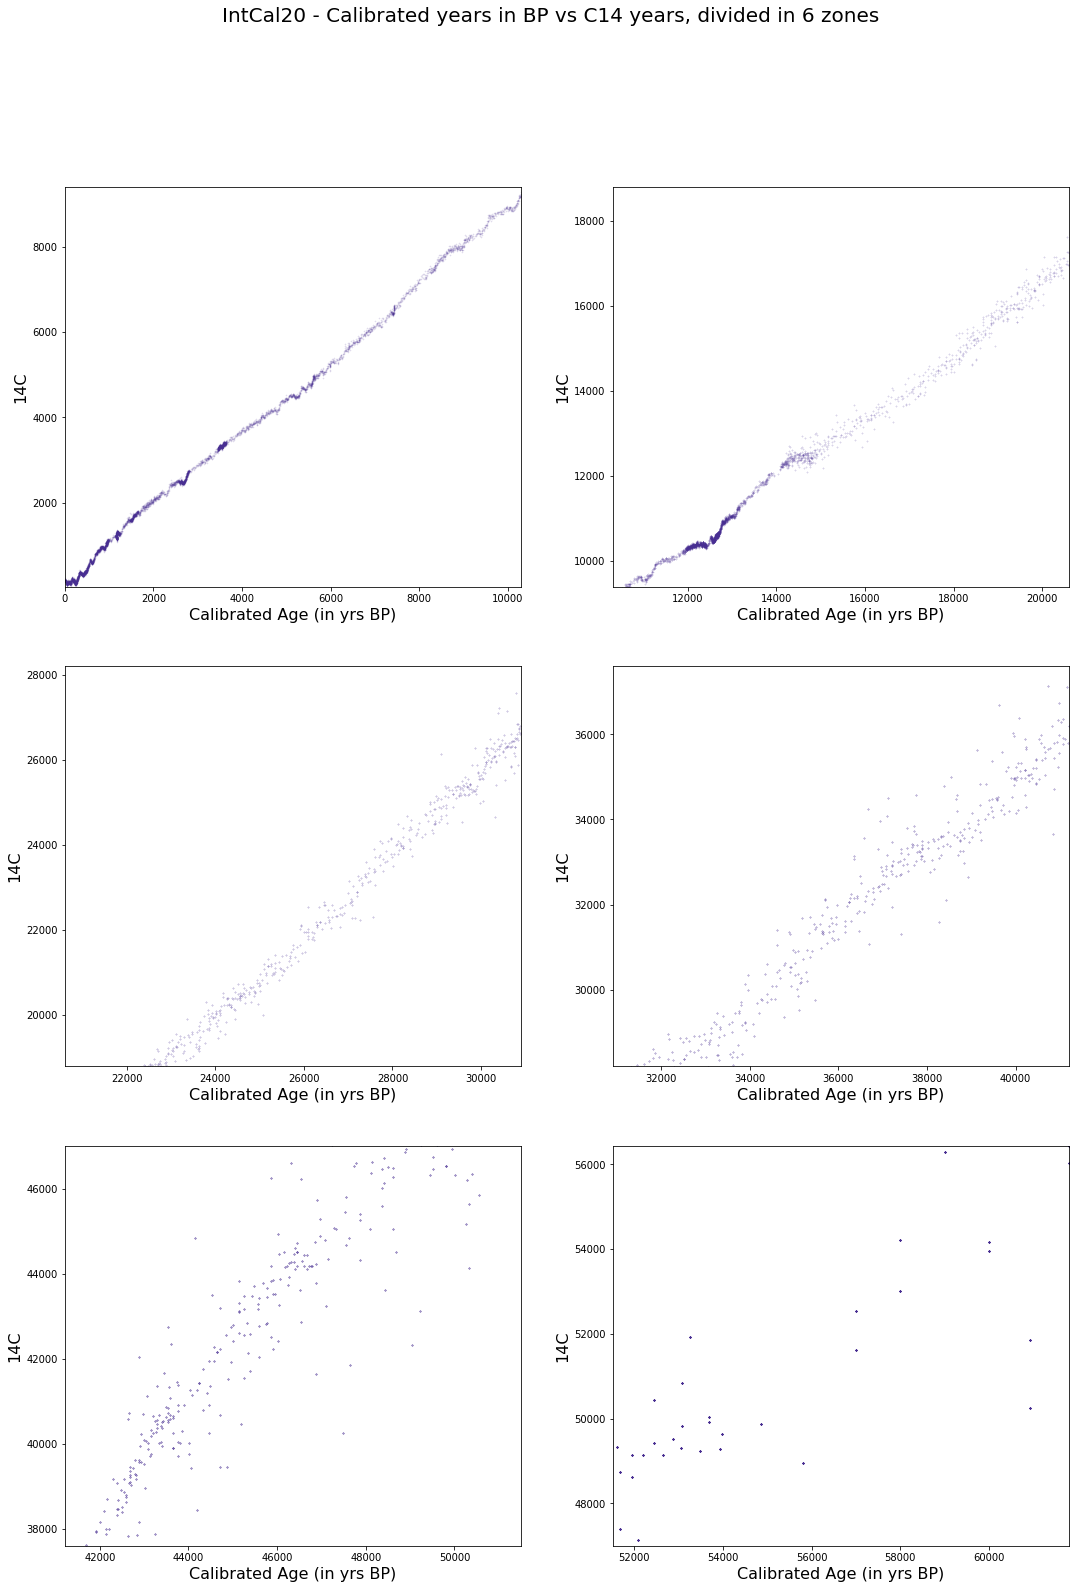

In [13]:
print(f"Min of cal: {df_intcal['cal'].min()}\tMax of cal: {df_intcal['cal'].max()}")
print(f"Min of c14: {df_intcal['c14'].min()}\t\tMax of c14: {df_intcal['c14'].max()}")

# Fix N=6
N=6

# Divide in 6 regions
fig, axs = plt.subplots(
    # rows
    nrows=3,
    # cols
    ncols=2,
    # 
    figsize=(18,25)
)


# Set suptitle
fig.suptitle(f'IntCal20 - Calibrated years in BP vs C14 years, divided in {N} zones', fontsize=20)

# Delta
Delta_x_plot = ( df_intcal['cal'].max() - df_intcal['cal'].min() ) / N
Delta_y_plot = ( df_intcal['c14'].max() - df_intcal['c14'].min() ) / N

for n in range(0, N):
    # We have to set col and row number:
    # 
    # The figures have to be set following the pattern:
    #
    #   0     1
    #   2     3
    #   4     5
    #
    # So that, from the point of view of a 2x3 matrix, the indeces are
    #
    #   (0,0)     (0,1)
    #   (1,0)     (1,1)
    #   (2,0)     (2,1)
    #
    # So:
    # 1. n even => col_num = 0, n odd => col_num = 1
    # 2. The integer part of the division of n by 2 is instead the row number
    
    # Set column number
    col_num = n%2
    # set row number
    row_num = n//2
        
    # define temp ax
    ax = axs[row_num, col_num] 
    
    # set plot
    ax.scatter(
        # set interval of data
        x=df_intcal['cal'],
        y=df_intcal['c14'],
        # marker
        marker = 'x',
        # color
        c = '#482e92', # Fiorentina's purple,
        # alpha
        alpha=1/(6-n),
        # Marker scale
        s = 0.4*(n+1)
    )
    
    # set plot limits
    if n == 0:
        x_min = df_intcal['cal'].min()
    else:
        x_min = n * Delta_x_plot
        
    if n == 5:
        x_max = df_intcal['cal'].max()
    else:
        x_max = (n+1) * Delta_x_plot
        
    if n == 0:
        y_min = df_intcal['c14'].min()
    else:
        y_min = n * Delta_y_plot
        
    if n == 5:
        y_max = df_intcal['c14'].max()
    else:
        y_max = (n+1) * Delta_y_plot
        
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Add label
    ax.set_xlabel('Calibrated Age (in yrs BP)' , fontsize=16)
    ax.set_ylabel('14C' , fontsize=16)
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #ax.label_outer()



### 3.0.2. Error plots

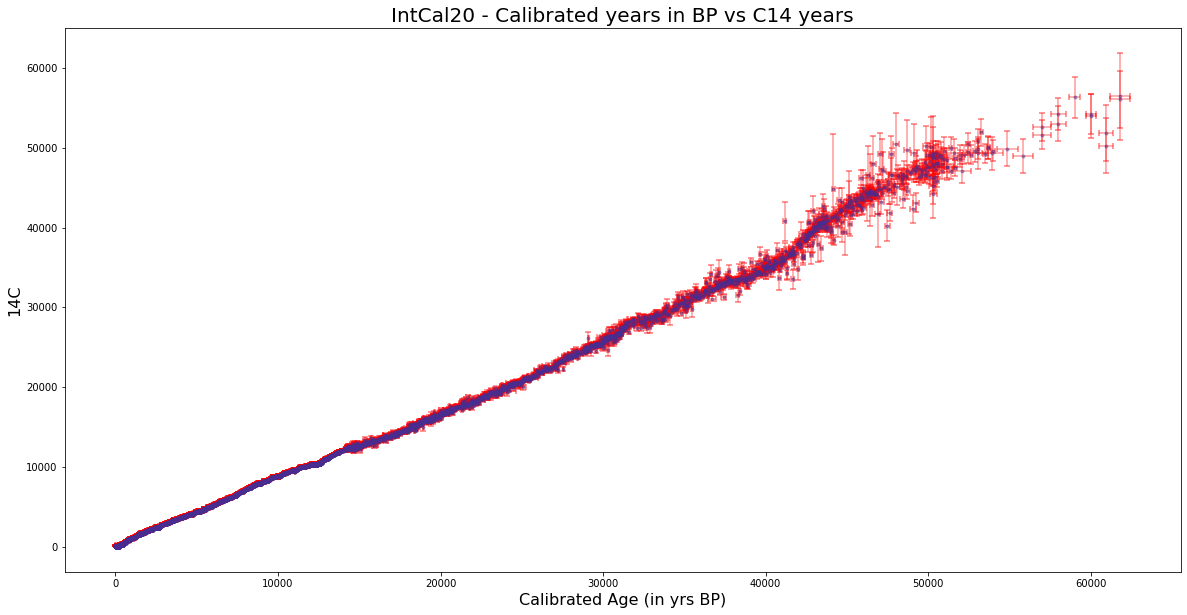

In [14]:
# Add errorbars
plt.figure(
    figsize=(20,10)
)

plt.errorbar(
    # locations
    x=df_intcal['cal'],
    y=df_intcal['c14'],
    # errors
    xerr=df_intcal['calsig'],
    yerr=df_intcal['c14sig'],
    # format of data points; 
    # list of markers: https://matplotlib.org/stable/api/markers_api.html
    # we can juxtapose the color, or add to c
    fmt = '.', # 
    c = '#482e92',
    # color of the errors
    ecolor='r',
    # alpha
    alpha=0.4,
    # Thick the caps
    capsize=3,
    capthick=2
)

plt.xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
plt.ylabel( '14C' , fontsize=16)
plt.title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

plt.show()

Min of cal: -4.0	Max of cal: 61806.2
Min of c14: 32		Max of c14: 56430


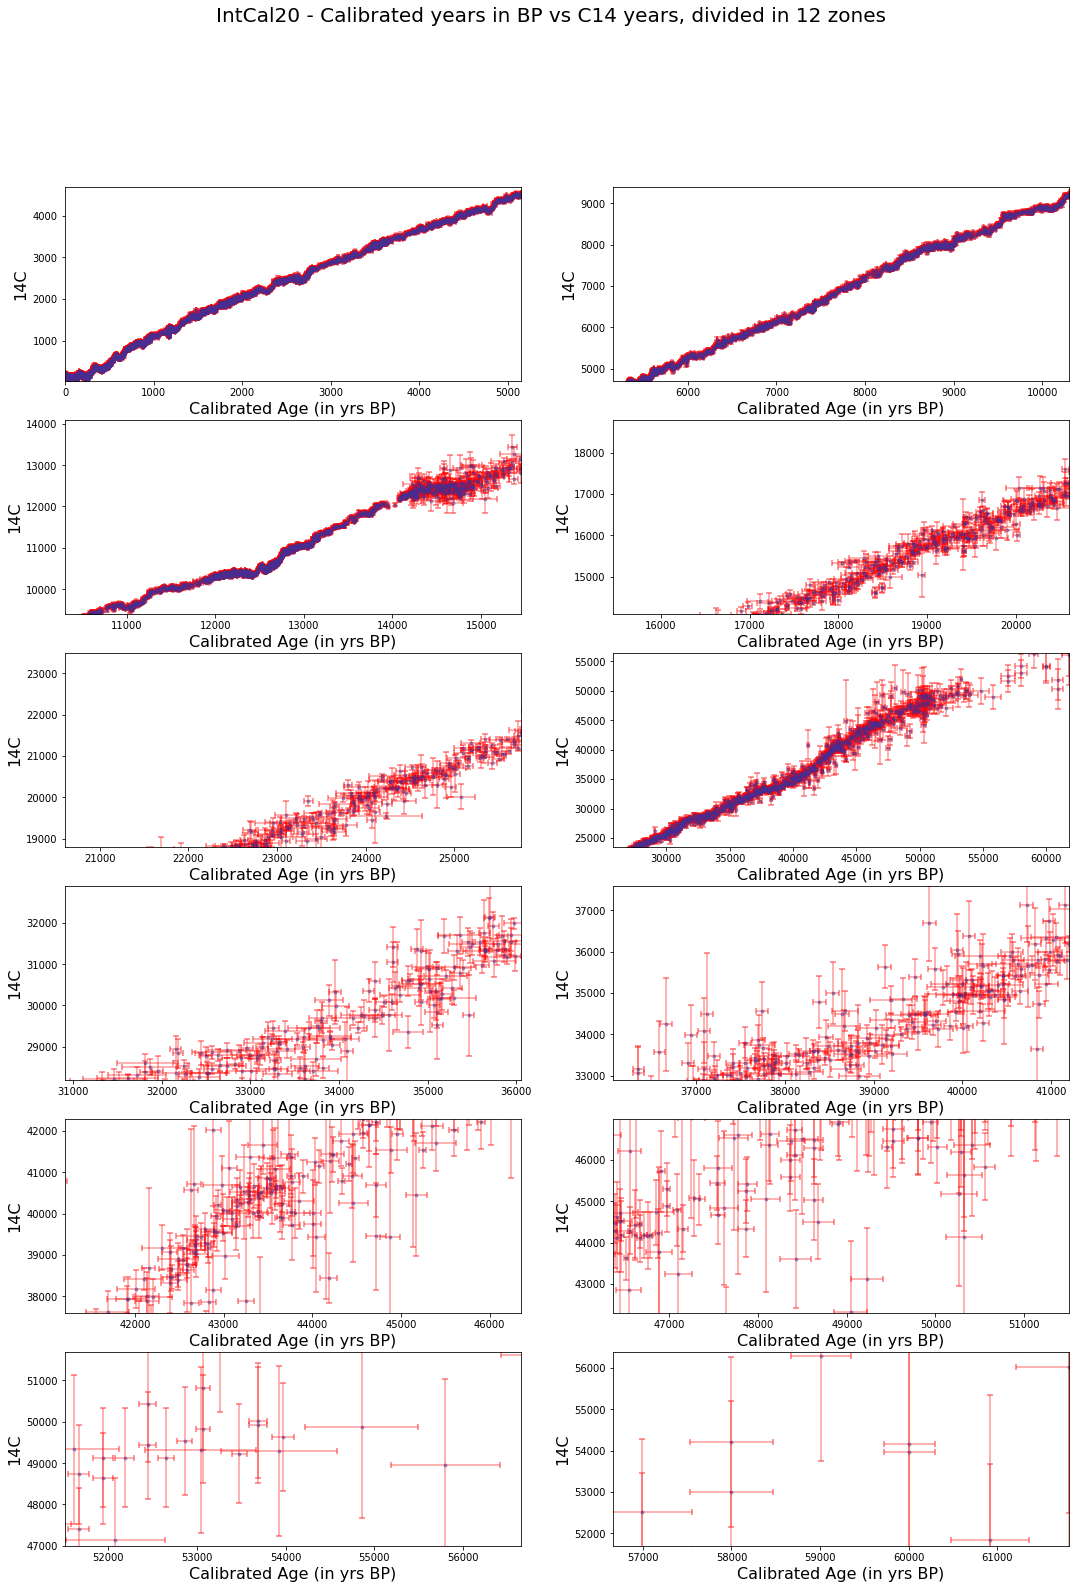

In [15]:
#########################################
# EXERCISE
#########################################

# Do the same multiplot (divided in an even number greater than 6) adding errorbars.

print(f"Min of cal: {df_intcal['cal'].min()}\tMax of cal: {df_intcal['cal'].max()}")
print(f"Min of c14: {df_intcal['c14'].min()}\t\tMax of c14: {df_intcal['c14'].max()}")

# Fix N
N=12

# Divide in 6 regions
fig, axs = plt.subplots(
    # rows
    nrows=12//2,
    # cols
    ncols=2,
    # 
    figsize=(18,25)
)



# Set suptitle
fig.suptitle(f'IntCal20 - Calibrated years in BP vs C14 years, divided in {N} zones', fontsize=20)

# Delta
Delta_x_plot = ( df_intcal['cal'].max() - df_intcal['cal'].min() ) / N
Delta_y_plot = ( df_intcal['c14'].max() - df_intcal['c14'].min() ) / N

for n in range(0, N):
    # We have to set col and row number:
    # 
    # The figures have to be set following the pattern:
    #
    #   0     1
    #   2     3
    #   4     5
    #
    # So that, from the point of view of a 2x3 matrix, the indeces are
    #
    #   (0,0)     (0,1)
    #   (1,0)     (1,1)
    #   (2,0)     (2,1)
    #
    # So:
    # 1. n even => col_num = 0, n odd => col_num = 1
    # 2. The integer part of the division of n by 2 is instead the row number
    
    # Set column number
    col_num = n%2
    # set row number
    row_num = n//2
        
    # define temp ax
    ax = axs[row_num, col_num] 
    
    # set plot
    ax.errorbar(
        # locations
        x=df_intcal['cal'],
        y=df_intcal['c14'],
        # errors
        xerr=df_intcal['calsig'],
        yerr=df_intcal['c14sig'],
        # format of data points; 
        # list of markers: https://matplotlib.org/stable/api/markers_api.html
        # we can juxtapose the color, or add to c
        fmt = '.', # 
        c = '#482e92',
        # color of the errors
        ecolor='r',
        # alpha
        alpha=0.4,
        # Thick the caps
        capsize=3,
        capthick=2
    )

    
    # set plot limits
    if n == 0:
        x_min = df_intcal['cal'].min()
    else:
        x_min = n * Delta_x_plot
        
    if n == 5:
        x_max = df_intcal['cal'].max()
    else:
        x_max = (n+1) * Delta_x_plot
        
    if n == 0:
        y_min = df_intcal['c14'].min()
    else:
        y_min = n * Delta_y_plot
        
    if n == 5:
        y_max = df_intcal['c14'].max()
    else:
        y_max = (n+1) * Delta_y_plot
        
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Add label
    ax.set_xlabel('Calibrated Age (in yrs BP)' , fontsize=16)
    ax.set_ylabel('14C' , fontsize=16)
    
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    #ax.label_outer()



In [16]:
####################################
# EXERCISE
####################################

# Do the same as above, but set the y-limits for each graph as the min and max of the values for y 
# in the x_min, x_max region
# (hint: you should use some slicing of pandas series)

#### 3.0.3. Fill areas of plot

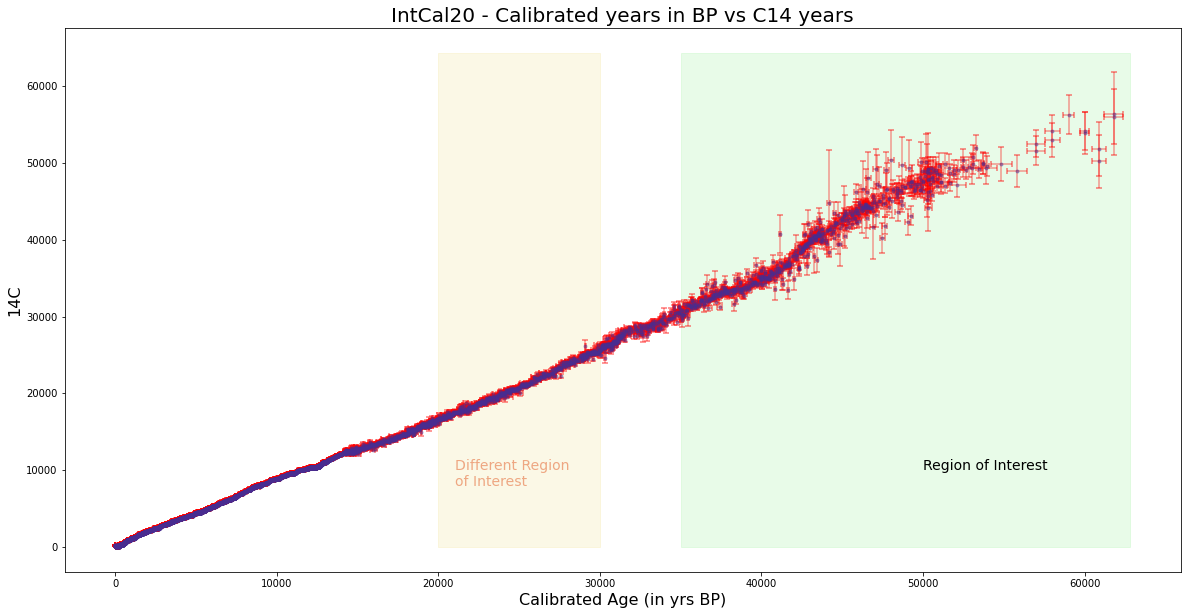

In [17]:
# Add errorbars

# plot
fig, ax = plt.subplots(
    figsize=(20,10)
)

ax.errorbar(
    # locations
    x=df_intcal['cal'],
    y=df_intcal['c14'],
    # errors
    xerr=df_intcal['calsig'],
    yerr=df_intcal['c14sig'],
    # format of data points; 
    # list of markers: https://matplotlib.org/stable/api/markers_api.html
    # we can juxtapose the color, or add to c
    fmt = '.', # 
    c = '#482e92',
    # color of the errors
    ecolor='r',
    # alpha
    alpha=0.4,
    # Thick the caps
    capsize=3,
    capthick=2
)

ax.set_xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
ax.set_ylabel( '14C' , fontsize=16)
ax.set_title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

####
# Highlight late region
ax.fill_betweenx(
    y=[0, df_intcal['c14'].max() + df_intcal['c14sig'].max() + 1000],
    x1=[35000],
    x2=[df_intcal['cal'].max() + 1000],
    color='#90ee90', #'grey',
    alpha=0.2
    
)
ax.text(50000, 10000, f'Region of Interest', fontsize=14)

ax.fill_betweenx(
    y=[0, df_intcal['c14'].max() + df_intcal['c14sig'].max() + 1000],
    x1=[20000],
    x2=[30000],
    color='#EEDD82', #'grey',
    alpha=0.2
    
)
ax.text(21000, 10000, f'Different Region', fontsize=14, c='#eea782')
ax.text(21000, 8000, f'of Interest', fontsize=14, c='#eea782')

plt.show()

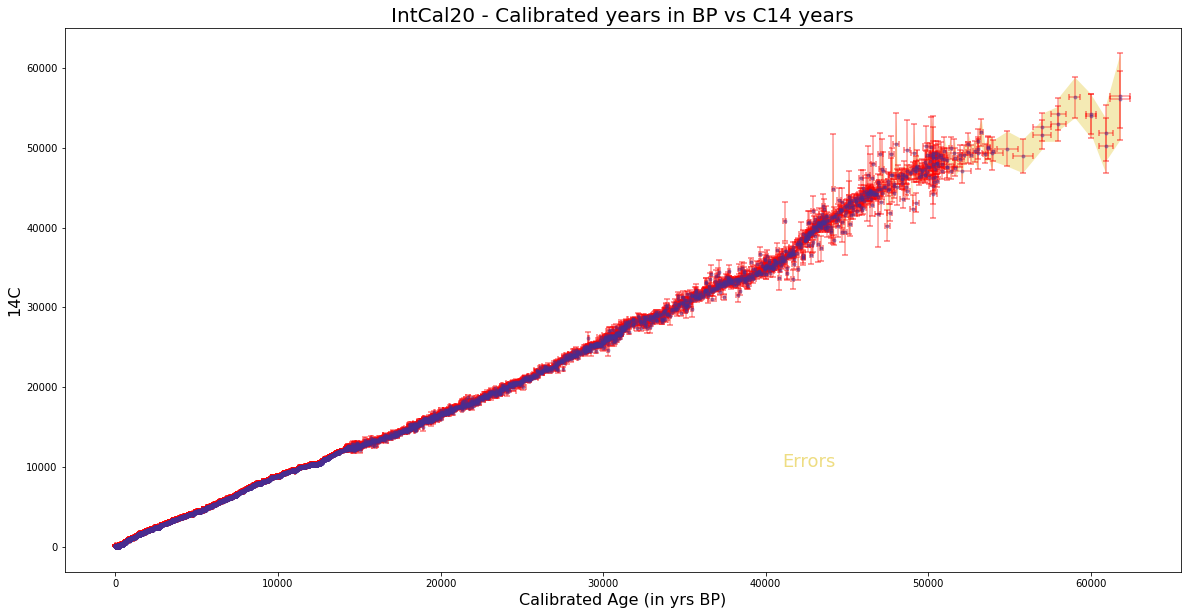

In [18]:
# Add errorbars

# plot
fig, ax = plt.subplots(
    figsize=(20,10)
)

ax.errorbar(
    # locations
    x=df_intcal['cal'],
    y=df_intcal['c14'],
    # errors
    xerr=df_intcal['calsig'],
    yerr=df_intcal['c14sig'],
    # format of data points; 
    # list of markers: https://matplotlib.org/stable/api/markers_api.html
    # we can juxtapose the color, or add to c
    fmt = '.', # 
    c = '#482e92',
    # color of the errors
    ecolor='r',
    # alpha
    alpha=0.4,
    # Thick the caps
    capsize=3,
    capthick=2
)

ax.set_xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
ax.set_ylabel( '14C' , fontsize=16)
ax.set_title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

####
# Highlight late region

ax.fill_between(
    x = df_intcal['cal'],
    y1= df_intcal['c14'] + df_intcal['c14sig'],
    y2= df_intcal['c14'] - df_intcal['c14sig'],
    color='#EEDD82', 
    alpha=0.6,
    linewidth=0,
    interpolate=True
    
)
ax.text(41000, 10000, f'Errors', fontsize=18, c='#EEDD82')

#ax.set_xbound(40000, 47000)
#ax.set_ybound(30000, 54000)


plt.show()

#### Add fitting line
We know that, in first approximation, the variation (due to nuclear decay) of unstable nucleons is governed by the differential equation
$$\frac{dN(t)}{dt} = - \lambda N(t) \,,$$
i.e. the variation over time of the population of $N(t)$ instable nucleons is proportional to the number of instable nucleons at a given time; the proportional number $\lambda$ is called *decay rate*. 

If we know that, at a certain time $t_0$, the population is $N(t_0)=N_0$, we have the Cauchy problem
$$\left\{   \begin{matrix}  \frac{dN(t)}{dt} = - \lambda N(t) \,, \\  N(t_0)=N_0 \,, \end{matrix} \right.$$

whose solution can be easily found to be
$$ N(t) = N_0 \, \mathrm{e}^{-\lambda(t-t_0)} \,. $$

We see that, manipulating this equation
$$
    - (t - t_0) = \lambda^{-1} \; \log  \frac{N(t)}{N_0} \; .
$$
identifying the RHS with the 14C/12C ratio, the LHS is the Y axis of our plot. 

One would then suppose that

$$14C \simeq \text{Calibrated Age}$$

Let's check it

Text(0.5, 1.0, 'IntCal20 - Calibrated years in BP vs C14 years')

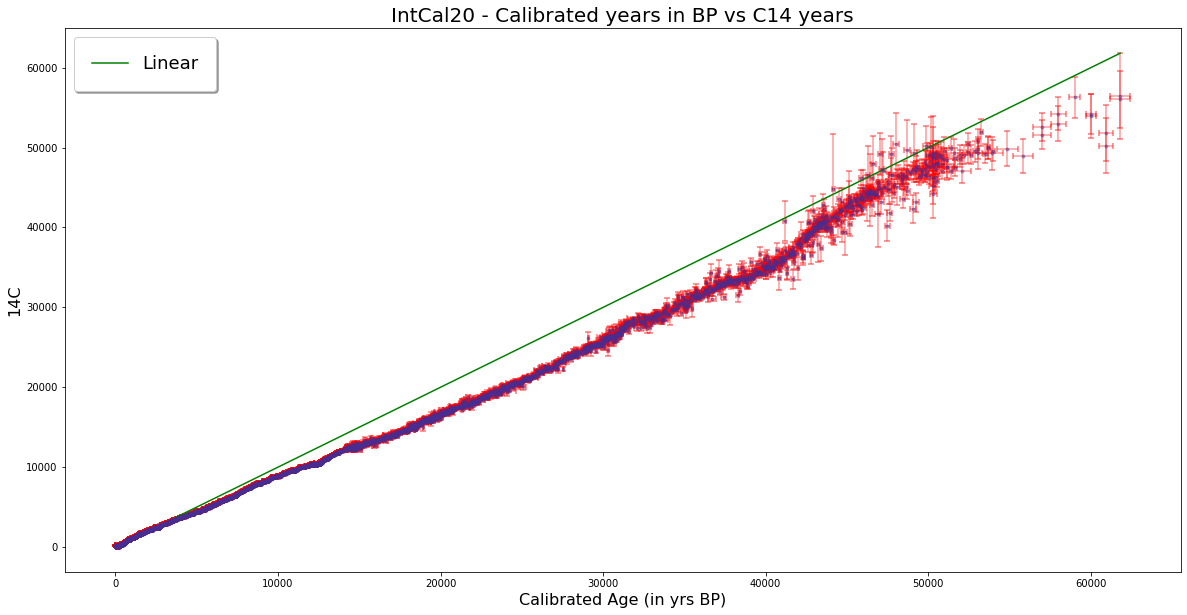

In [19]:
# plot
fig, ax = plt.subplots(
    figsize=(20,10)
)

ax.errorbar(
    # locations
    x=df_intcal['cal'],
    y=df_intcal['c14'],
    # errors
    xerr=df_intcal['calsig'],
    yerr=df_intcal['c14sig'],
    # format of data points; 
    # list of markers: https://matplotlib.org/stable/api/markers_api.html
    # we can juxtapose the color, or add to c
    fmt = '.', # 
    c = '#482e92',
    # color of the errors
    ecolor='r',
    # alpha
    alpha=0.4,
    # Thick the caps
    capsize=3,
    capthick=2
)

# Add line plot
X_to_plot = np.arange(df_intcal['cal'].min(), df_intcal['cal'].max())
ax.plot(
    X_to_plot, X_to_plot, 
    color='green',
    label='Linear'
)

# add legend
ax.legend(
    loc='upper left', 
    fontsize=18,
    framealpha=1, shadow=True, borderpad=1
)

ax.set_xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
ax.set_ylabel( '14C' , fontsize=16)
ax.set_title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

Now we plot the deviation from the linear behaviour

Text(0.5, 1.0, 'IntCal20 - Calibrated years in BP vs C14 years')

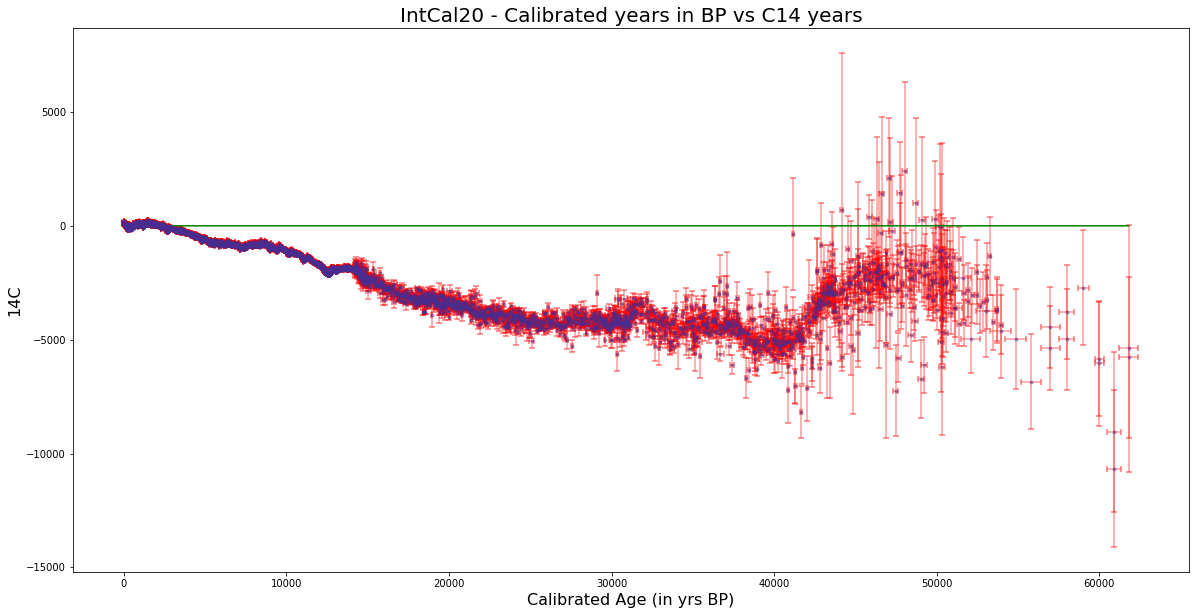

In [20]:
# plot
fig, ax = plt.subplots(
    figsize=(20,10)
)



ax.errorbar(
    # locations
    x=df_intcal['cal'],
    y=df_intcal['c14']-df_intcal['cal'],
    # errors
    xerr=df_intcal['calsig'],
    yerr=df_intcal['c14sig'],
    # format of data points; 
    # list of markers: https://matplotlib.org/stable/api/markers_api.html
    # we can juxtapose the color, or add to c
    fmt = '.', # 
    c = '#482e92',
    # color of the errors
    ecolor='r',
    # alpha
    alpha=0.4,
    # Thick the caps
    capsize=3,
    capthick=2
)

ax.plot(
    df_intcal['cal'], np.zeros(len(df_intcal['cal'])), 
    color='green',
    label='Linear'
)




ax.set_xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
ax.set_ylabel( '14C' , fontsize=16)
ax.set_title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

Text(0.5, 1.0, 'IntCal20 - Calibrated years in BP vs C14 years')

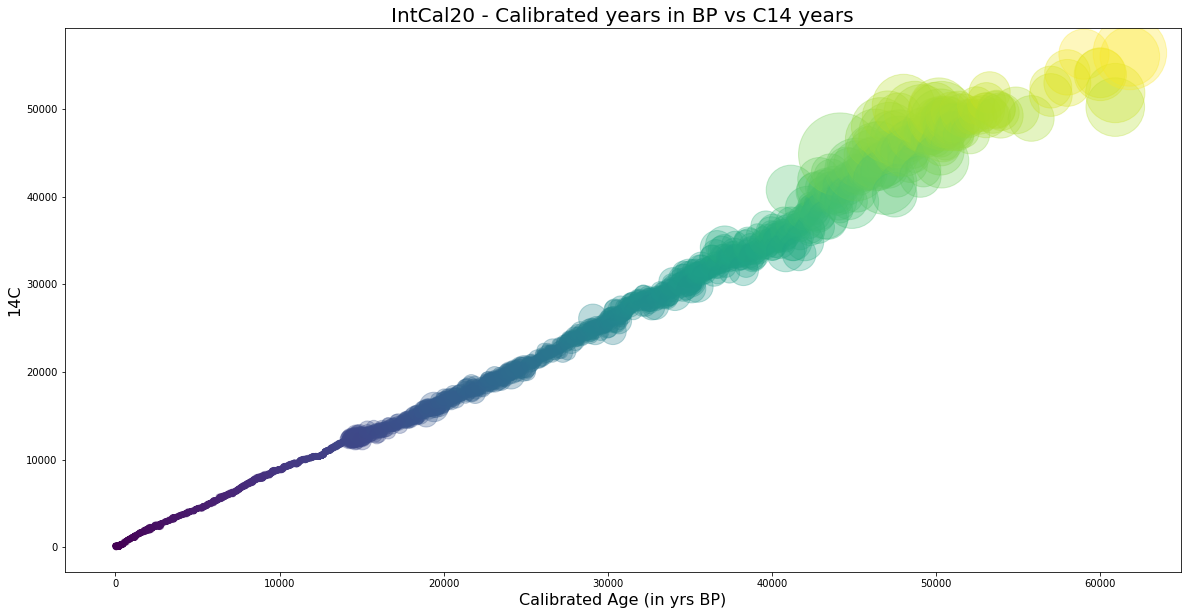

In [21]:
## Another scatter plot vrsion
# plot
fig, ax = plt.subplots(
    figsize=(20,10)
)

ax.scatter(
    'cal',
    'c14',
    data=df_intcal,
    s=df_intcal['c14sig'],
    c='c14', # weird color scale
    alpha=0.3
)

ax.set_xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
ax.set_ylabel( '14C' , fontsize=16)
ax.set_title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

Text(0.5, 1.0, 'IntCal20 - Calibrated years in BP vs C14 years')

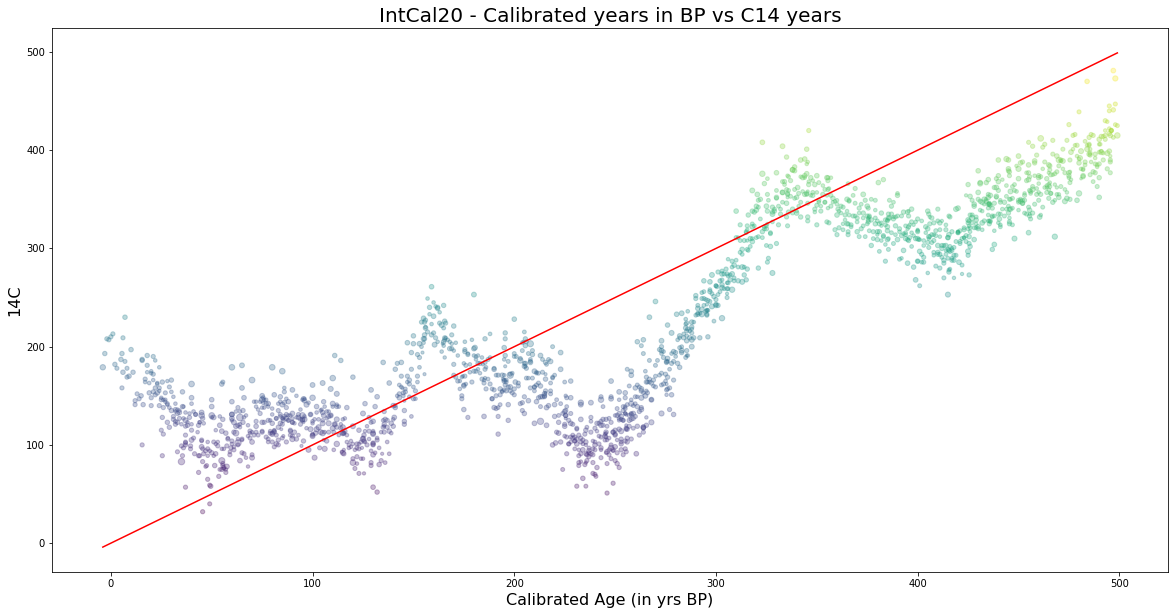

In [22]:
## Another scatter plot vrsion
# plot
fig, ax = plt.subplots(
    figsize=(20,10)
)

lim_in_time = 500

ax.scatter(
    'cal',
    'c14',
    data=df_intcal[df_intcal['cal']<lim_in_time],
    s=df_intcal[df_intcal['cal']<lim_in_time]['c14sig'],
    c='c14', # weird color scale
    alpha=0.3
)

ax.plot(
    df_intcal[df_intcal['cal']<lim_in_time]['cal'], df_intcal[df_intcal['cal']<lim_in_time]['cal'], 
    color='red',
    label='Linear'
)


# ax.set_xlim(
#     [df_intcal['cal'].min() - 5, 2000]
# )

# ax.set_ylim(
#     [df_intcal['c14'].min() - 5, 2000]
# )

ax.set_xlabel( 'Calibrated Age (in yrs BP)' , fontsize=16)
ax.set_ylabel( '14C' , fontsize=16)
ax.set_title('IntCal20 - Calibrated years in BP vs C14 years', fontsize=20)

## 3.1. Statistical Plots

In [23]:
df = pd.read_excel(
    './Datasets/Pokemon/Pokemon.xlsx',
     engine='openpyxl',
    index_col=None
)

display( df.head() )

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

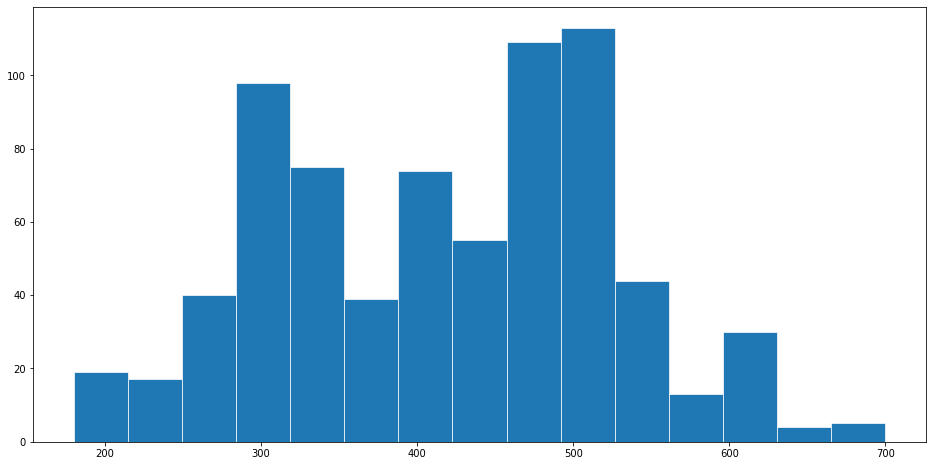

In [24]:
# plot
fig, ax = plt.subplots(
    figsize=(16,8)
)

ax.hist(
    x= df[~df['Legendary']]['Total'], 
    #width=1, 
    edgecolor="white", 
    bins=15,
    linewidth=0.7
)

plt.show()

### 3.1.1. Violin plots

As Wikipedia says:
```
A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side.

Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high. 
```

Visually:
<div>
    <img src='./Assets/Images/box_vs_violin_plots.png'>
    <img src='./Assets/Images/viz_box_vs_viol_plots.gif'>
</div>

Mathematically [1],[2], Violin plots use the *Kernel Density Estimator* to compute the probability distribution of the elements $x_i$ appearing in the dataset; i.e., if we suppose our experimental data $\{x_i\}_{i=1,\ldots,N}$ are obtained as random extraction from an unknown distribution function $f(x)$, we estimate it with $f_h(x)$ defined as 
$$f_h(x) = \frac{1}{N} \sum_{i=1}^n K_h(x-x_i) \,,$$

where $K_h$ is the *kernel function*, which depends on a smoothinh parameter $h$ called *bandwidth*; famous Kernels are [2]

- Gaussian
$$K_h(x) \propto \exp\left(- \frac{x^2}{2h^2} \right)$$
- Tophat
$$K_h(x) \propto 1\,, \quad |x|<h$$
- Epanechnikov
$$K_h(x) \propto 1 - \frac{x^2}{h^2} $$
- Exponential
$$K_h(x) \propto \exp \left(- \frac{x}{h} \right)$$
- Linear
$$K_h(x) \propto  1 - \frac{x}{h}\,, \quad |x|<h $$
- Epanechnikov
$$K_h(x) \propto \cos \left( \frac{\pi x}{2h}   \right) \,, \quad |x|<h $$



<img src='./Assets/Images/KDE_kernels.png'>

------
[1] https://en.wikipedia.org/wiki/Kernel_density_estimation

[2] https://scikit-learn.org/stable/modules/density.html

Text(0.5, 1.0, 'KDE of distribution of Totals by Legendary-ness')

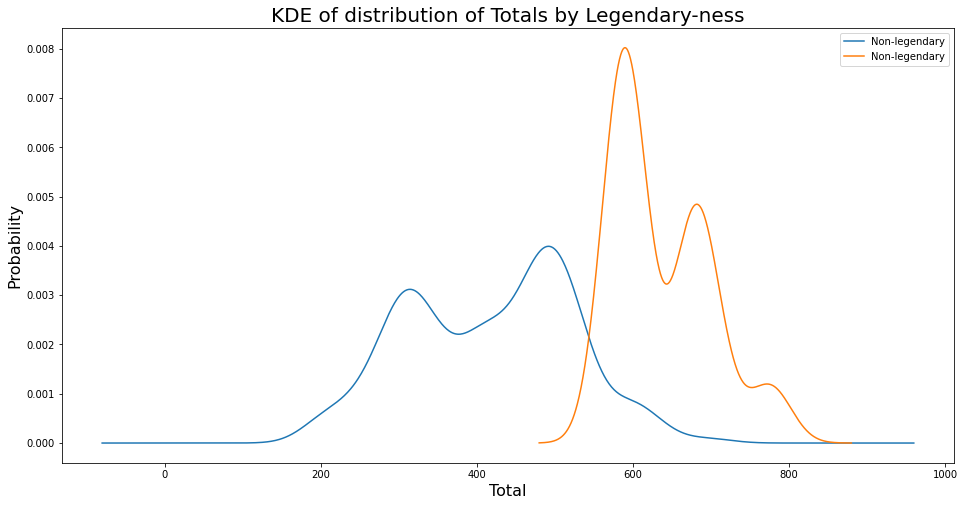

In [25]:
plt.figure(figsize=(16,8))

ax = df[~df['Legendary']]['Total'].plot.kde(label='Non-legendary')

ax = df[df['Legendary']]['Total'].plot.kde(label='Non-legendary')

ax.legend()
ax.set_xlabel( 'Total' , fontsize=16)
ax.set_ylabel( 'Probability' , fontsize=16)
ax.set_title('KDE of distribution of Totals by Legendary-ness', fontsize=20)

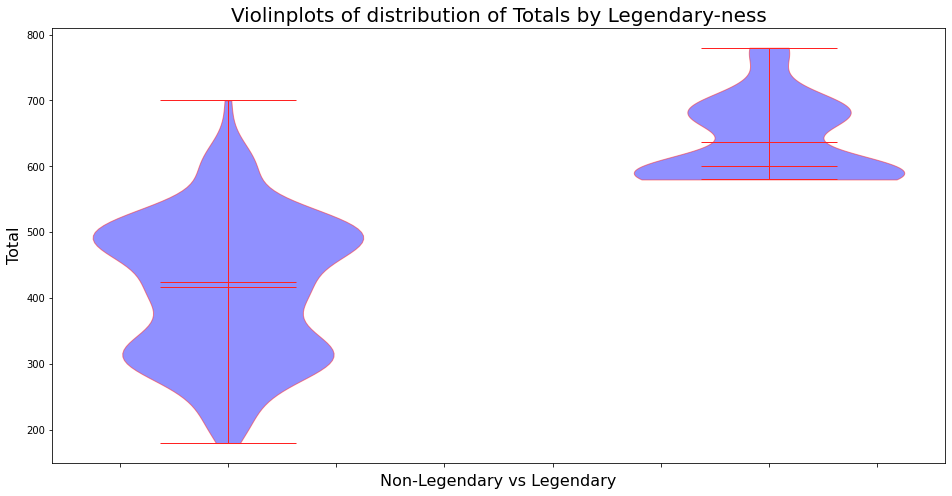

In [26]:
# plot
fig, ax = plt.subplots(
    figsize=(16,8)
)

violin_parts = ax.violinplot(
    dataset = [ 
        df[~df['Legendary']]['Total'] ,
        df[df['Legendary']]['Total']
    ], 
    #widths=2,
    showmeans=True, 
    showmedians=True, 
    showextrema=True
    
)


# Make all the violin statistics marks red:
for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = violin_parts[partname]
    vp.set_edgecolor('#ff2222')
    vp.set_linewidth(1)

# Make the violin body blue with a red border:
for vp in violin_parts['bodies']:
    vp.set_facecolor('#2222ff')
    vp.set_edgecolor('#ff2222')
    vp.set_linewidth(1)
    vp.set_alpha(0.5)

    
ax.set_xlabel( 'Non-Legendary vs Legendary' , fontsize=16)
ax.set_xticklabels([]) # removes x-numbers
ax.set_ylabel( 'Total' , fontsize=16)
ax.set_title('Violinplots of distribution of Totals by Legendary-ness', fontsize=20)

plt.show()

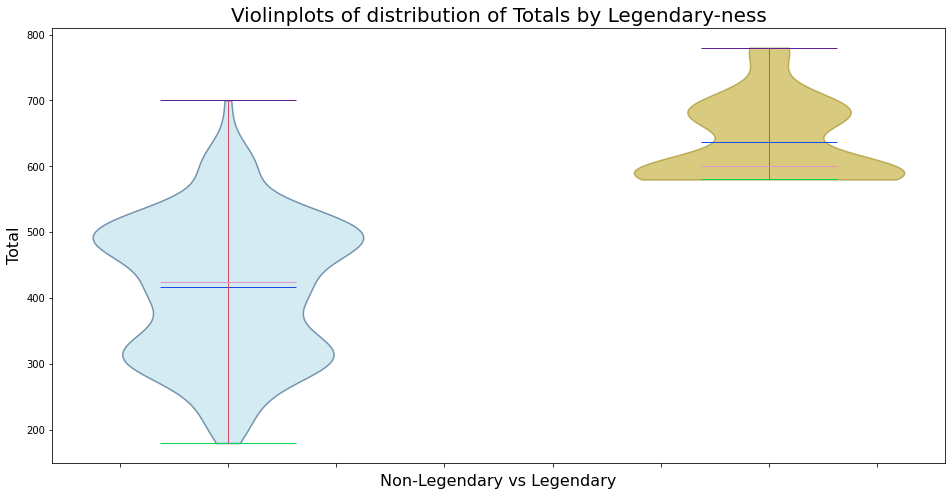

In [27]:
# plot
fig, ax = plt.subplots(
    figsize=(16,8)
)

violin_parts = ax.violinplot(
    dataset = [ 
        df[~df['Legendary']]['Total'] ,
        df[df['Legendary']]['Total']
    ], 
    #widths=2,
    showmeans=True, 
    showmedians=True, 
    showextrema=True
    
)


# Make all the violin statistics marks red:
part_colors = [
    '#d14b66', # California Wine
    '#02d653', # Malachite
    '#602191', # Banafš Violet
    '#194aea', # Azul
    '#e094ca', # Crepe Myrtle
]

for idx, partname in enumerate( ('cbars','cmins','cmaxes','cmeans','cmedians') ): 
    vp = violin_parts[partname]
    vp.set_edgecolor(
        part_colors[idx]
    )
    vp.set_linewidth(1)

# Make the violin body
face_colors = [
    '#add8e6', # lightblue for non-legendary pkmn
    '#b29700'  # lightgold for     legendary pkmn
]

edge_colors = [
    '#003366', # blue for non-legendary pkmn
    '#8e7900'  # gold for     legendary pkmn
]


for idx, vp in enumerate(violin_parts['bodies']):
    vp.set_facecolor(
        face_colors[idx]
    )
    vp.set_edgecolor(
        edge_colors[idx]
    )
    vp.set_linewidth(1.5)
    vp.set_alpha(0.5)


    
ax.set_xlabel( 'Non-Legendary vs Legendary' , fontsize=16)
ax.set_xticklabels([]) # removes x-numbers
ax.set_ylabel( 'Total' , fontsize=16)
ax.set_title('Violinplots of distribution of Totals by Legendary-ness', fontsize=20)
    
plt.show()

### 3.1.2. Event Plot

In [28]:
import random

def random_hex_color():
    return f'#{"%06x" % random.randint(0, 0xFFFFFF)}'

In [29]:
list_of_df_gen = []
cols_gen = []

for gen in df['Generation'].unique():
    condition_to_split = (df['Generation']==gen) 
    
    list_of_df_gen.append(
        df[condition_to_split]['Total']
    )
    
    # Add random color per gen
    # %x in C-based languages is a string formatter to format integers as hexadecimal strings while 0x is the prefix to write numbers in base-16.
    rand_col = random_hex_color()
    
    cols_gen.append(
        rand_col
    )


Text(0.5, 1.0, 'Counts of Totals by Generations')

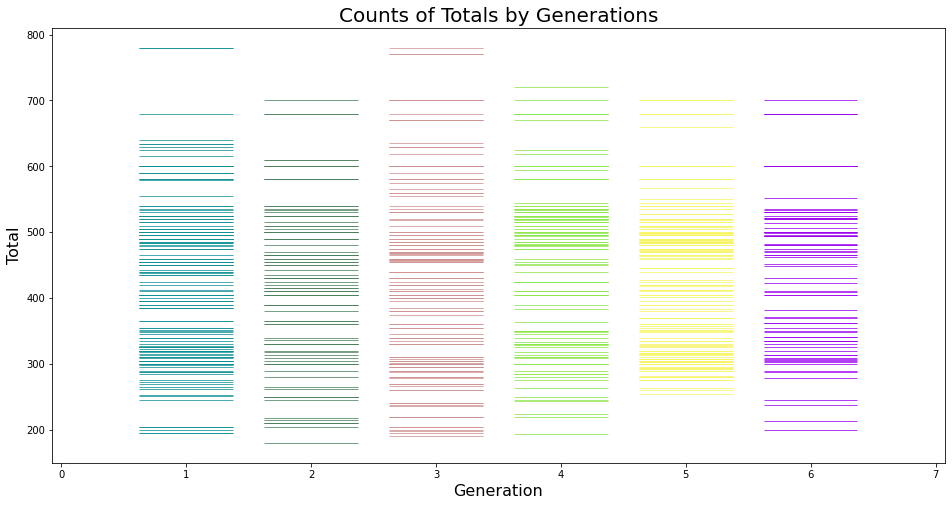

In [30]:
# plot
fig, ax = plt.subplots(
    figsize=(16,8)
)

ax.eventplot(
    list_of_df_gen,
    orientation="vertical", 
    lineoffsets= df['Generation'].unique(), 
    linewidth=0.75,
    linelengths=0.75,
    colors=cols_gen
)

ax.set_xlabel( 'Generation' , fontsize=16)
#ax.set_xticklabels([]) # removes x-numbers
ax.set_ylabel( 'Total' , fontsize=16)
ax.set_title('Counts of Totals by Generations', fontsize=20)

#### All togheter

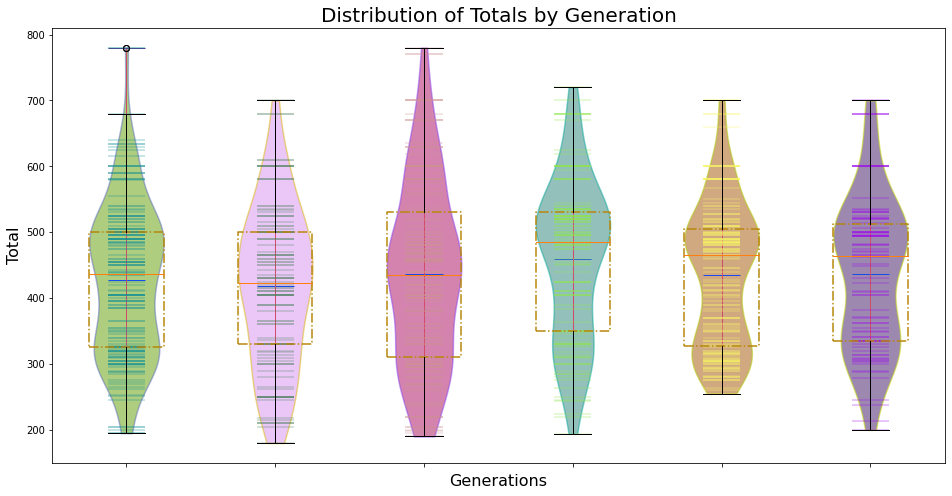

In [31]:
# plot
fig, ax = plt.subplots(
    figsize=(16,8)
)

###################
# Violin plot

violin_parts = ax.violinplot(
    dataset = list_of_df_gen, 
    #widths=2,
    showmeans=True, 
    showmedians=True, 
    showextrema=True
    
)


# Make all the violin statistics marks red:
part_colors = [
    '#d14b66', # California Wine
    '#02d653', # Malachite
    '#602191', # Banafš Violet
    '#194aea', # Azul
    '#e094ca', # Crepe Myrtle
]

for idx, partname in enumerate( ('cbars','cmins','cmaxes','cmeans','cmedians') ): 
    vp = violin_parts[partname]
    vp.set_edgecolor(
        part_colors[idx]
    )
    vp.set_linewidth(1)

# Make the violin body
face_colors = [ random_hex_color() for x in list_of_df_gen ]

edge_colors = [ random_hex_color() for x in list_of_df_gen ]


for idx, vp in enumerate(violin_parts['bodies']):
    vp.set_facecolor(
        face_colors[idx]
    )
    vp.set_edgecolor(
        edge_colors[idx]
    )
    vp.set_linewidth(1.5)
    vp.set_alpha(0.5)

    
###################
# Box plot
boxprops = dict(linestyle='-.', linewidth=1.5, color='darkgoldenrod')

ax.boxplot(
    list_of_df_gen,
    boxprops=boxprops
)

###################
# Count plot

ax.eventplot(
    list_of_df_gen,
    orientation="vertical", 
    lineoffsets= df['Generation'].unique(), 
    linewidth=0.45,
    linelengths=0.25,
    colors=cols_gen
)


    
ax.set_xlabel( 'Generations' , fontsize=16)
ax.set_xticklabels([]) # removes x-numbers
ax.set_ylabel( 'Total' , fontsize=16)
ax.set_title('Distribution of Totals by Generation', fontsize=20)
    
plt.show()

#### Questions
1. Do the same graphs WITHOUT legendary pokemons.
2. Why apparently each generation has a bimodal KDE, even after having removed the Legendary from the game?